# DATA

In [455]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [456]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

In [457]:
!pip install -U imbalanced-learn
from imblearn.under_sampling import RandomUnderSampler

## load data & dropna

In [458]:
# Read salary data
file_path = Path("Resources/Stroke_dataset.csv")
df_stroke = pd.read_csv(file_path)

# Display sample data
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [459]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [460]:
df_stroke["bmi"].isnull

<bound method Series.isnull of 0       36.6
1        NaN
2       32.5
3       34.4
4       24.0
        ... 
5105     NaN
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 5110, dtype: float64>

In [461]:
df_stroke_cleaned = df_stroke.dropna(subset=['bmi'])
df_stroke_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


## preprocess categorical data

In [462]:
X = df_stroke_cleaned.drop(columns=['stroke'], inplace=False)
y = df_stroke_cleaned['stroke']

In [463]:
X = pd.get_dummies(X)
X.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False
2,31112,80.0,0,1,105.92,32.5,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
4,1665,79.0,1,0,174.12,24.0,True,False,False,False,...,False,False,True,False,True,False,False,False,True,False
5,56669,81.0,0,0,186.21,29.0,False,True,False,False,...,False,True,False,False,False,True,False,True,False,False


## train test split via sklearn

In [464]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.15,
                                                    random_state=42, 
                                                    stratify=y)

In [465]:
# Undersample (select)
undersampler = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [466]:
# Oversample (select)
#SMOTE
#smote = SMOTE(random_state=1)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [467]:
import numpy as np

unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class Distribution After Resample:", dict(zip(unique, counts)))


Class Distribution After Resample: {0: 178, 1: 178}


In [468]:
X_train.shape

(4172, 22)

In [469]:
X_test.shape

(737, 22)

In [470]:
X_train_resampled.shape

(356, 22)

In [471]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train_resampled)

# Scale the training data
X_train_scaled = scaler.transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# MODELS

In [472]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Decsion Tree
from sklearn.tree import DecisionTreeClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import seaborn as sns
# DNN
import tensorflow as tf
import keras_tuner as kt

from sklearn.metrics import confusion_matrix,classification_report, r2_score, accuracy_score


## logistic regression

In [473]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [474]:
# Train the data
classifier.fit(X_train_scaled, y_train_resampled)

LogisticRegression(random_state=1)

In [475]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8173537871524449
Testing Data Score: 0.824966078697422


/opt/anaconda3/envs/AP-env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/envs/AP-env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [476]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

/opt/anaconda3/envs/AP-env/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,Prediction,Actual
4646,0,0
829,0,0
3191,0,0
3199,0,0
495,0,0
...,...,...
3746,0,0
3515,0,0
3510,0,0
2291,0,0


In [477]:
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.824966078697422

In [478]:
# Print confusion matrix
log_cm = confusion_matrix(predictions, y_test)

log_cm_df = pd.DataFrame(log_cm, index=["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"])

log_cm_df

,Predicted 0,Predicted 1
Actual 0,602,25
Actual 1,104,6


In [479]:
# Print classification report
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       627
           1       0.19      0.05      0.09       110

    accuracy                           0.82       737
   macro avg       0.52      0.51      0.49       737
weighted avg       0.75      0.82      0.78       737



## knn

In [480]:
# Instantiate the model with k = 3 neighbors
model = KNeighborsClassifier(n_neighbors=3)

In [481]:
# Train the model
model.fit(X_train_scaled, y_train_resampled)

KNeighborsClassifier(n_neighbors=3)

In [482]:
# Create predictions
y_pred = model.predict(X_test_scaled)

# Review the predictions
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [483]:
# Print confusion matrix
confusion_matrix(y_pred,y_test)

array([[479,  10],
       [227,  21]])

In [484]:
# Print classification report
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80       489
           1       0.68      0.08      0.15       248

    accuracy                           0.68       737
   macro avg       0.68      0.53      0.48       737
weighted avg       0.68      0.68      0.58       737



## decision tree

In [485]:
# Step 6: Train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Limit depth to avoid overfitting
clf.fit(X_train, y_train)

# Step 7: Evaluate the model
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       706
           1       0.00      0.00      0.00        31

    accuracy                           0.96       737
   macro avg       0.48      0.50      0.49       737
weighted avg       0.92      0.96      0.94       737



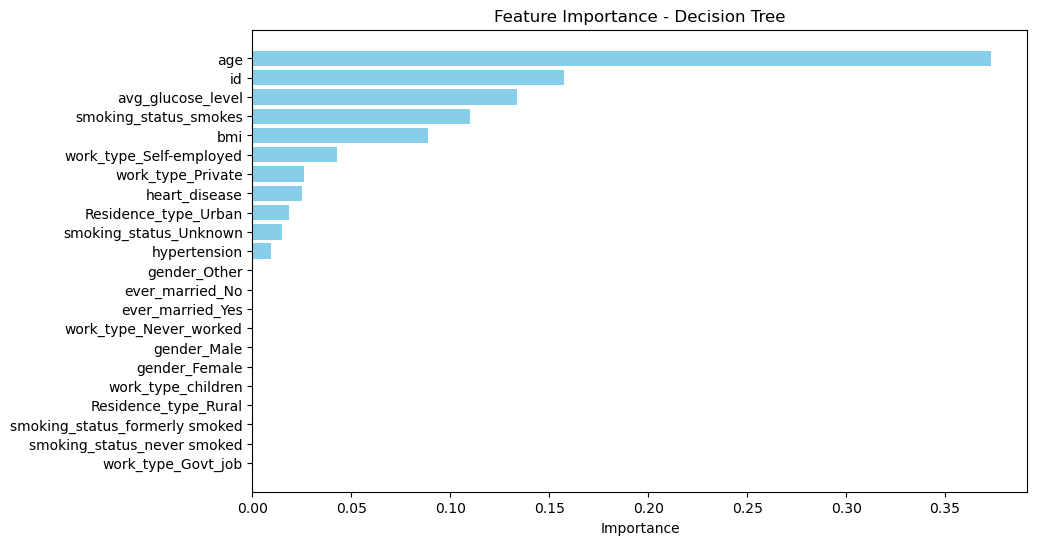

In [486]:
# Extract feature importance from the Decision Tree
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()  
plt.show()

## random forest

In [487]:
# Step 6: Train a Random Forest Classifier
rf_clf = RandomForestClassifier(
    n_estimators=100,    # Number of trees
    max_depth=10,        # Maximum depth of each tree
    random_state=42,
    class_weight="balanced"  # Address class imbalance
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [488]:
# Step 7: Evaluate the model
y_pred = rf_clf.predict(X_test)
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       706
           1       0.10      0.10      0.10        31

    accuracy                           0.93       737
   macro avg       0.53      0.53      0.53       737
weighted avg       0.92      0.93      0.93       737



In [489]:
# Extract feature importance from the Random Forest model
feature_importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_clf.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

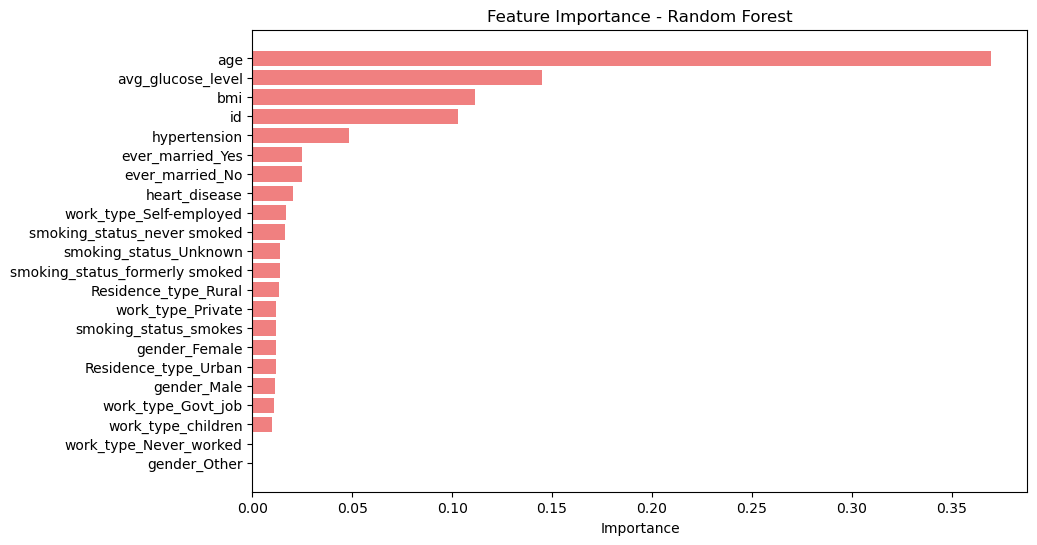

In [490]:
# Plot the feature importance for Random Forest
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='lightcoral')
plt.xlabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

## naive bayes

Correlation Matrix:
                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.003084  0.333398      0.167811       0.041357   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.003084  0.006388  
age                         0.238171  0.333398  0.245257  
hypertension                0.174474  0.167811  0.127904  
heart_disease               0.161857  0.041357  0.134914  
avg_glucose_level           1.000000  0.175502  0.131945  
bmi                         0.175502  1.000000  0.042374  
stroke

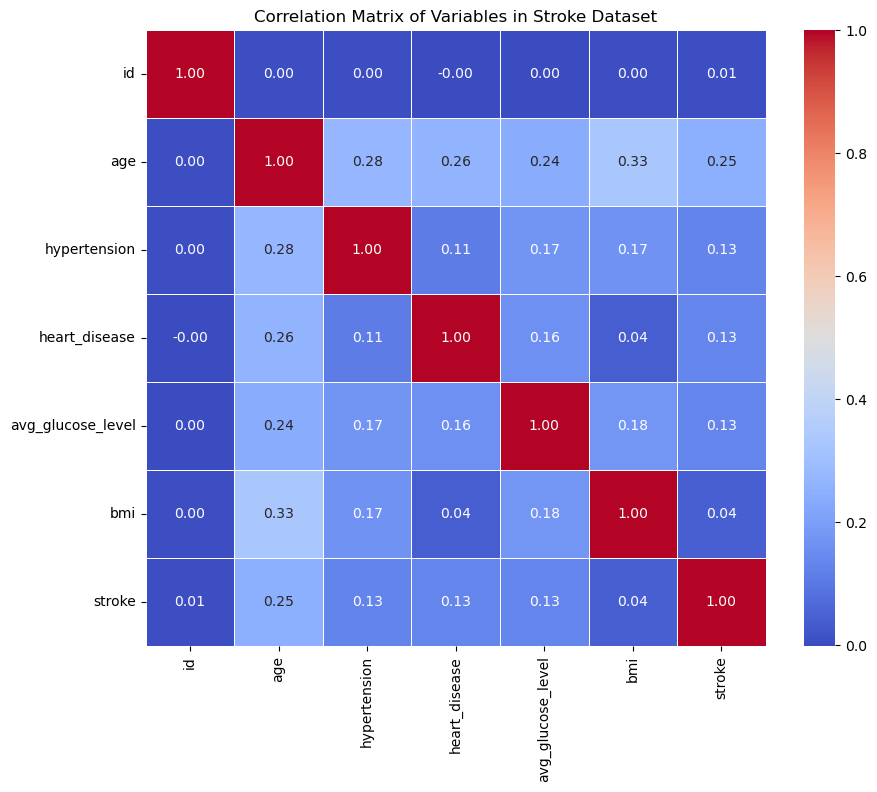

In [491]:
# Correlation matrix of variables in the stroke dataset 


# Read the stroke data
file_path = Path("resources/Stroke_dataset.csv")
df_stroke = pd.read_csv(file_path)

# Display first few rows to understand the dataset
df_stroke.head()

# Data Preprocessing: 
# Check the correlation matrix for only the numerical variables (e.g., 'age', 'hypertension', 'heart_disease', 'bmi', etc.)
numerical_columns = df_stroke.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_stroke[numerical_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Variables in Stroke Dataset")
plt.show()


/var/folders/vq/8gn33wss1l72z06t1yprfr3w0000gn/T/ipykernel_719/1120308579.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, ax=axes[0], palette='Set2')
/var/folders/vq/8gn33wss1l72z06t1yprfr3w0000gn/T/ipykernel_719/1120308579.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, ax=axes[1], palette='Set2')


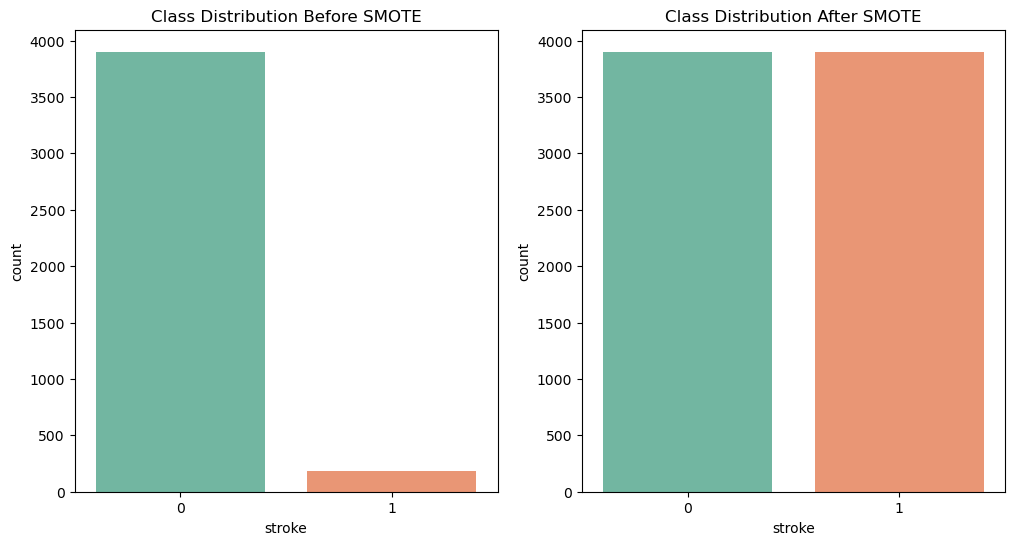

Initial Accuracy: 72.11%
Initial Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.15      0.76      0.25        62

    accuracy                           0.72      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.93      0.72      0.79      1022

Initial Confusion Matrix:
[[690 270]
 [ 15  47]]


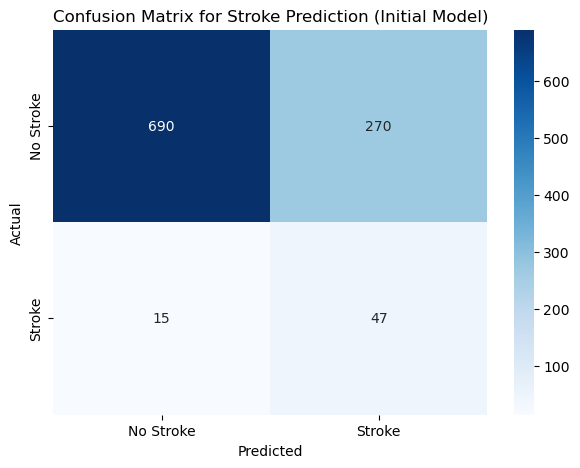

Best hyperparameters from GridSearchCV: {'var_smoothing': 1e-09}
Optimized Accuracy: 72.11%
Optimized Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       960
           1       0.15      0.76      0.25        62

    accuracy                           0.72      1022
   macro avg       0.56      0.74      0.54      1022
weighted avg       0.93      0.72      0.79      1022

Optimized Confusion Matrix:
[[690 270]
 [ 15  47]]


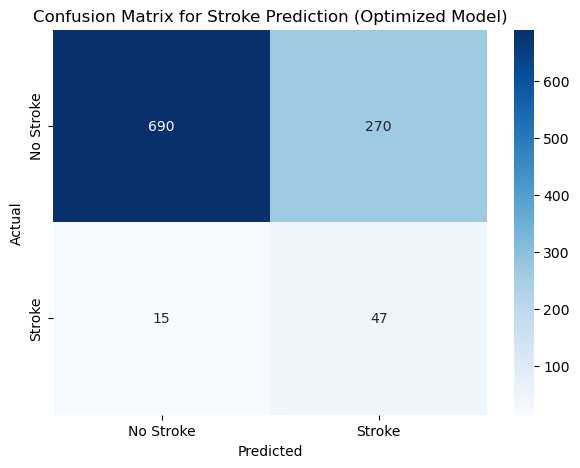

Final Model Performance:
       Model  Accuracy  Best var_smoothing
0    Initial  0.721135                 NaN
1  Optimized  0.721135        1.000000e-09


/var/folders/vq/8gn33wss1l72z06t1yprfr3w0000gn/T/ipykernel_719/1120308579.py:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Set1')


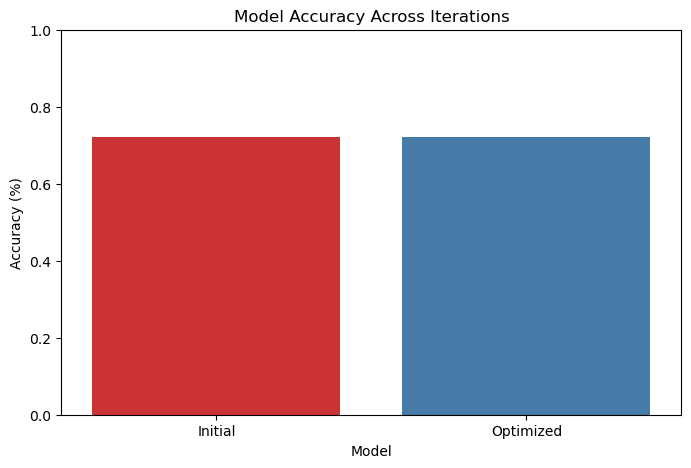

In [492]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

# Read stroke data
file_path = Path("resources/Stroke_dataset.csv")
df_stroke = pd.read_csv(file_path)

# Data Preprocessing
# Handle missing values (e.g., impute missing BMI values with the median)
imputer = SimpleImputer(strategy="median")
df_stroke['bmi'] = imputer.fit_transform(df_stroke[['bmi']])

# Encode categorical columns (e.g., gender, marital status, work type, residence type, smoking status)
label_encoders = {}
for column in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    le = LabelEncoder()
    df_stroke[column] = le.fit_transform(df_stroke[column])
    label_encoders[column] = le

# Split the dataset into features (X) and target (y)
X = df_stroke.drop(columns=['id', 'stroke'])  # Features
y = df_stroke['stroke']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features to bring them to the same scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(x=y_train, ax=axes[0], palette='Set2')
axes[0].set_title("Class Distribution Before SMOTE")
sns.countplot(x=y_train_smote, ax=axes[1], palette='Set2')
axes[1].set_title("Class Distribution After SMOTE")
plt.show()

# 2. Train Naive Bayes model on the balanced dataset
model = GaussianNB()
model.fit(X_train_smote, y_train_smote)

# 3. Evaluate the model on the test data
y_pred = model.predict(X_test_scaled)

# 4. Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy: {accuracy * 100:.2f}%")

# 5. Generate classification report (precision, recall, F1-score)
print("Initial Classification Report:")
print(classification_report(y_test, y_pred))

# 6. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Initial Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix for the initial model
plt.figure(figsize=(7, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stroke Prediction (Initial Model)')
plt.show()

# 7. Hyperparameter Tuning using GridSearchCV (for Naive Bayes)
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

# Best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters from GridSearchCV: {best_params}")

# Retrain model with best parameters
optimized_model = GaussianNB(var_smoothing=best_params['var_smoothing'])
optimized_model.fit(X_train_smote, y_train_smote)

# Evaluate the optimized model
y_pred_optimized = optimized_model.predict(X_test_scaled)

# Optimized Accuracy
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy: {optimized_accuracy * 100:.2f}%")

# Optimized Classification Report
print("Optimized Classification Report:")
print(classification_report(y_test, y_pred_optimized))

# Optimized Confusion Matrix
optimized_conf_matrix = confusion_matrix(y_test, y_pred_optimized)
print("Optimized Confusion Matrix:")
print(optimized_conf_matrix)

# Visualize the optimized confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(optimized_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stroke Prediction (Optimized Model)')
plt.show()

# 8. Track Model Performance Across Iterations (Initial, SMOTE, Optimized)
results = {
    'Model': ['Initial', 'Optimized'],
    'Accuracy': [accuracy, optimized_accuracy],
    'Best var_smoothing': [None, best_params['var_smoothing']],
}
results_df = pd.DataFrame(results)

# Save the results to a CSV file for iterative tracking
results_df.to_csv('model_optimization_results.csv', index=False)

# Final Model Performance Output
print("Final Model Performance:")
print(results_df)

# Visualization of Model Performance Over Iterations
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='Set1')
plt.title('Model Accuracy Across Iterations')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 1)
plt.show()


## dnn

In [493]:

# Define the model creation function
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu', 'tanh', 'sigmoid'])

    # Allow kerastuner to decide number of neurons in the first layer
    nn_model.add(tf.keras.layers.Dense(
        units=hp.Int('first_units', min_value=1, max_value=12, step=2),
        activation=activation,
        input_dim=22
    ))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(
            units=hp.Int('units_' + str(i), min_value=1, max_value=10, step=2),
            activation=activation
        ))

    # Add output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

# Instantiate the tuner
tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    directory="my_dir",
    project_name="tune_model"
)

# Run the kerastuner search for best hyperparameters
fit_model=tuner.search(X_train_scaled, y_train_resampled, epochs=20, validation_data=(X_test_scaled, y_test))

# Display the search results
tuner.results_summary()

Reloading Tuner from my_dir/tune_model/tuner0.json
Results summary
Results in my_dir/tune_model
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0046 summary
Hyperparameters:
activation: tanh
first_units: 11
num_layers: 3
units_0: 9
units_1: 9
units_2: 5
units_3: 7
units_4: 9
units_5: 9
tuner/epochs: 20
tuner/initial_epoch: 7
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 0044
Score: 0.9592834115028381

Trial 0058 summary
Hyperparameters:
activation: tanh
first_units: 3
num_layers: 4
units_0: 3
units_1: 3
units_2: 9
units_3: 5
units_4: 5
units_5: 9
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.958469033241272

Trial 0044 summary
Hyperparameters:
activation: tanh
first_units: 11
num_layers: 3
units_0: 9
units_1: 9
units_2: 5
units_3: 7
units_4: 9
units_5: 9
tuner/epochs: 7
tuner/initial_epoch: 3
tuner/bracket: 2
tuner/round: 1
tuner/trial_id: 0032
Score: 0.958469033241272

Trial 0056 summary
Hyperparameters:
activation: re

In [494]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 11,
 'num_layers': 3,
 'units_0': 9,
 'units_1': 9,
 'units_2': 5,
 'units_3': 7,
 'units_4': 9,
 'units_5': 9,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0044'}

In [495]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

/opt/anaconda3/envs/AP-env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/anaconda3/envs/AP-env/lib/python3.9/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 22, but received input with shape (None, 10)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 10), dtype=float32)
  • training=False
  • mask=None

In [ ]:
predictions = best_model.predict(X_test_scaled)

# Convert predictions to binary or class labels (depending on your model output)
# Assuming a binary classification model with a sigmoid activation
predicted_classes = (predictions > 0.5).astype(int)



# Generate a classification report
target_names = ["Class 0", "Class 1"]  # Update with your actual class names
print(classification_report(y_test, predicted_classes, target_names=target_names))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
              precision    recall  f1-score   support

     Class 0       0.96      1.00      0.98       706
     Class 1       0.00      0.00      0.00        31

    accuracy                           0.96       737
   macro avg       0.48      0.50      0.49       737
weighted avg       0.92      0.96      0.94       737



/opt/anaconda3/envs/AP-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/AP-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/AP-env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)  # Ensure `predicted_classes` are processed as per the earlier snippet

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_df)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, predicted_classes)
print(f"Accuracy Score: {acc_score:.2f}")

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0          706            0
Actual 1           31            0
Accuracy Score: 0.96
